In [1]:
import pandas as pd
import astropy.units as u
from astropy.coordinates import Distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import bilby
import bilby.gw.utils as ut

In [2]:
bilby.core.utils.log.setup_logger(log_level=0)

In [3]:
# import the samples
samples = pd.read_csv('params_for_SNR.csv', index_col=0)
# convert our redshifts into luminosity distances
# samples['dl'] = (samples['redshift']* astropy.cosmology.units.redshift).to(u.Mpc, astropy.cosmoloy.units.redshift_distance(None, kind="luminosity")) 
d = Distance(unit=u.Mpc, z = samples['redshift'], cosmology = None).value
dl = np.asarray(d)
samples = samples.assign(dl = dl)
samples = samples.assign(mass_1_det = samples['mass_1']*(1+samples['redshift']))
samples = samples.assign(mass_2_det = samples['mass_2']*(1+samples['redshift']))
samples

,mass_1,mass_ratio,a_1,a_2,cos_tilt_1,cos_tilt_2,redshift,mass_2,chi_eff,tilt_1,...,sin_tilt_1,sin_tilt_2,chi_p,spin1z,spin2z,spin1x,spin2x,dl,mass_1_det,mass_2_det
0,14.206189,0.753297,0.084464,0.150304,-0.261760,0.392646,0.906271,10.701485,0.012746,1.835642,...,0.965133,0.919690,0.100027,-0.022109,0.059016,0.081519,0.138233,6016.435895,27.080843,20.399927
1,7.631592,0.987168,0.301969,0.514466,-0.610410,-0.613718,1.837756,7.533664,-0.249606,2.227374,...,0.792086,0.789526,0.400233,-0.184325,-0.315737,0.239185,0.406184,14360.479388,21.656593,21.378695
2,6.088737,0.993740,0.235612,0.437827,0.873063,0.821194,2.090188,6.050621,0.282381,0.509347,...,0.487607,0.570649,0.248059,0.205704,0.359541,0.114886,0.249846,16804.436694,18.815344,18.697560
3,13.368498,0.656860,0.519649,0.126563,0.212090,-0.385168,1.802572,8.781230,0.047193,1.357083,...,0.977250,0.922846,0.507827,0.110213,-0.048748,0.507827,0.116798,14024.688026,37.466181,24.610031
4,23.997822,0.479771,0.313633,0.007355,0.270814,0.404514,1.759925,11.513460,0.058363,1.296558,...,0.962632,0.914532,0.301913,0.084936,0.002975,0.301913,0.006726,13619.365717,66.232183,31.776282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,9.782304,0.941944,0.027176,0.547558,-0.020054,0.942494,0.650648,9.214381,0.250040,1.590851,...,0.999799,0.334224,0.170916,-0.000545,0.516070,0.027171,0.183007,4011.292700,16.147137,15.209696
995,10.076905,0.942602,0.514802,0.481686,0.691731,0.687116,1.820907,9.498514,0.343911,0.806913,...,0.722155,0.726548,0.371767,0.356105,0.330974,0.371767,0.349968,14199.515059,28.426008,26.794420
996,6.066189,0.994744,0.373819,0.606443,0.462265,0.051141,0.806717,6.034305,0.102095,1.090249,...,0.886742,0.998691,0.602013,0.172803,0.031014,0.331481,0.605650,5215.339092,10.959885,10.902279
997,5.792281,0.996428,0.227619,0.346497,-0.669760,-0.677548,0.823380,5.771592,-0.193536,2.304681,...,0.742578,0.735478,0.253801,-0.152450,-0.234769,0.169025,0.254841,5347.752174,10.561531,10.523807


(array([348., 161.,  97.,  72.,  45.,  37.,  26.,  21.,  11.,   9.,  11.,
          9.,   7.,  10.,   4.,   6.,   2.,   5.,  22.,  37.,  32.,  10.,
          0.,   1.,   0.,   1.,   1.,   0.,   0.,   5.,   0.,   0.,   2.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 5.51912936,  7.03910219,  8.55907502, 10.07904784, 11.59902067,
        13.1189935 , 14.63896633, 16.15893916, 17.67891198, 19.19888481,
        20.71885764, 22.23883047, 23.75880329, 25.27877612, 26.79874895,
        28.31872178, 29.83869461, 31.35866743, 32.87864026, 34.39861309,
        35.91858592, 37.43855875, 38.95853157, 40.4785044 , 41.99847723,
        43.51845006, 45.03842289, 46.55839571, 48.07836854, 49.59834137,
        51.1183142 , 52.63828703, 54.15825985, 55.67823268, 57.19820551,
        58.71817834, 60.23815117, 61.75812399, 63.27809682, 64.79806965,
        66.31804248, 67.83801531, 69.35798813, 70.87796096, 72.39793379,
 

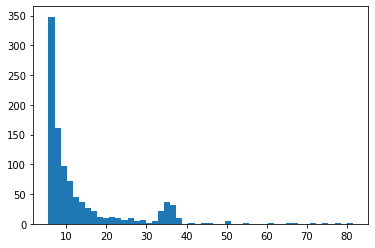

In [4]:
plt.hist(samples['mass_1'], bins=50)

**To do:**
* check how much difference an increased sampling frequency makes on the ultimate SNR
    * max freq will be half sampling_freq
    * plus safety factor
* duration
    * duration was 1 second
        * this produced an error for being a lower length of time in the detector than the length of the waveform
        * for a waveform of 42.7 seconds, a duration of 50 and 100 both produce the same SNR (3sf)
            * a little off from lal
            * this should be more accurate
            * peters and mathews inspiral papers 1963, 64
        * find a way to automate the choice of this
            * calculate_time_to_merger
    * inspiral length +2s
    * nominally for merger and ringdown
    * work in powers of 2 (bayeswave psds)
    * need a simple way of determining the chirp length in order to control this
        * this is done with the calculate_time_to_merger

* what are:
    * phi_12: Azimuthal angle between the two component spins
    * phi_jl: Azimuthal angle between the total binary angular momentum and the orbital angular momentum
        * wobbles with precession so changes
        * phi in orbital plane
        * uniform on 0,2pi or -pi,pi
    * theta_jn: Angle between the total binary angular momentum and the line of sight
        * this looks like the inclination, no this is theta_ln, iota
        * j is total ang mom
        * jn is angle between j and n(los)
        * uniform in cos, isotropic rather than uniform , on 0, pi
    * psi, polarisation
        * uniform
    * phi, phase
        * uniform
        * degeneracy between these
* check and plot the psd
* also look into the reference frequency
    * "Reference frequency at which the spins are calculated"
* parallelising on condor
    * notes should already be on the git site
* check if I have symmetric mass ratio or mass ratio
* check if my masses are source or detector frame
    * it seems they are source frame
    * https://colmtalbot.github.io/gwpopulation/GWTC1.html?highlight=detector%20frame in this population model the masses are source frame
    * I've sampled from the population models so my masses will be in the frame of those models, which should be source frame
    * looking for concrete confirmation of this
### Update orientation priors: cosine

In [4]:
# specify other terms
np.random.seed(220222)
N = len(samples['mass_1'])
theta_jn = np.arccos(np.random.uniform(-1,1,N))
psi = np.random.uniform(0,np.pi,N)
phase = np.random.uniform(0,2*np.pi,N)
ra = np.random.uniform(0,2*np.pi,N)
dec = np.random.uniform(-0.5*np.pi,0.5*np.pi,N)
phi_12 = np.random.uniform(0,2*np.pi,N)
phi_jl = np.random.uniform(0,2*np.pi,N)

In [5]:
duration = np.zeros(N)
for i in range(0,N,1):
    duration[i]=np.int(ut.calculate_time_to_merger(20,samples['mass_1_det'][i],samples['mass_2_det'][i], samples['chi_eff'][i]))

/data/wiay/johnny/phd1/phd1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
duration[349]

1.0

Loop through the simulated events and generate a waveform for each, inject this waveform into the LHV detectors and save the resulting optimal SNR.

In [127]:
# code from bilby tutorial
import bilby
import bilby.gw.utils as ut
import logging
import time
logger = bilby.core.utils.logger
logger.setLevel('WARNING')

H1_snr = np.zeros(N)
L1_snr = np.zeros(N)
V1_snr = np.zeros(N)

for i in range(0,N,1):
    #  Define injection parameters

    injection_dict=dict(mass_1=samples['mass_1_det'][i], mass_ratio=samples['mass_ratio'][i], redshift=samples['redshift'][i], 
        theta_jn=theta_jn[i], psi=psi[i], phase=phase[i], geocent_time=1200000000, 
        ra=ra[i], dec=dec[i], a_1=samples['a_1'][i], a_2=samples['a_2'][i], 
        phi_12=phi_12[i], phi_jl=phi_jl[i], 
        tilt_1=samples['tilt_1'][i], tilt_2=samples['tilt_2'][i])


    #  Define time and frequency parameters

    sampling_frequency=4096
    # this function uses lal to estimate the duration of the signal and multiplies it by a safety, 1.1 by default
    # the plus 2 is a safety to ensure the duration in the detector is longer than the signal, alt math.ceil
    duration=np.round(ut.calculate_time_to_merger(minimum_frequency,samples['mass_1_det'][i],samples['mass_2_det'][i], samples['chi_eff'][i])+2,0)
    trigger_time=injection_dict['geocent_time'] #- duration
    minimum_frequency=20

    # Sometimes the duration above 20Hz (or chosen frequency) is zero. In these cases I set the SNR to none.
    if duration is 0:
        H1_snr[i] = L1_snr[i] = V1_snr[i] = None

    else:

        #  Setup waveform generator

        waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                                reference_frequency=20., minimum_frequency=minimum_frequency)
        waveform_generator = bilby.gw.WaveformGenerator(
                duration=duration, sampling_frequency=sampling_frequency,
                frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
                waveform_arguments=waveform_arguments,
                parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters)


        #  Setup interferometers and inject signal

        ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
        for ifo in ifos:
            ifo.minimum_frequency = minimum_frequency
            ifo.maximum_frequency = sampling_frequency/2.
            # in controlling the psd, a separate file would need specified for LIGO (aLIGO) and Virgo (AdV)
            #ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='AdV_psd.txt')

        ifos.set_strain_data_from_power_spectral_densities(
            sampling_frequency=sampling_frequency, duration=duration,
            start_time=(trigger_time + 2 - duration))
        # try:
        #     ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)
        # except:
        #     print(injection_dict)
        #     print(duration)
        #     continue
        ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)

        # Access injection data
        H1_snr[i] = ifos.meta_data['H1']['optimal_SNR']
        L1_snr[i] = ifos.meta_data['L1']['optimal_SNR']
        V1_snr[i] = ifos.meta_data['V1']['optimal_SNR']

        #time.sleep(0.1)


16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
16:22 bilby WARNING : Injecting signal outside segment,

### Issues
* Sometimes the duration above 20Hz is zero. In these cases I set the SNR to none.
* Had some NaNs in the mass_2. This was due to m2 being to close to the allnowed range set by mmin in draw_from_posterior

### Next
* this is slow as a loop so set up the data file with multiple injections and see if that's faster.

In [128]:
samples = samples.assign(theta_jn = theta_jn,
    psi = psi,
    phase = phase,
    ra = ra,
    dec = dec,
    phi_12 = phi_12,
    phi_jl = phi_jl,
    H1_snr = H1_snr,
    L1_snr = L1_snr,
    V1_snr = V1_snr)

samples.tail()

,mass_1,mass_ratio,a_1,a_2,cos_tilt_1,cos_tilt_2,redshift,mass_2,chi_eff,tilt_1,...,H1_snr,L1_snr,V1_snr,theta_jn,psi,phase,ra,dec,phi_12,phi_jl
994,9.782304,0.941944,0.027176,0.547558,-0.020054,0.942494,0.650648,9.214381,0.250040,1.590851,...,0.914275,1.272485,1.472011,1.642980,2.606139,0.227400,4.478442,-0.038892,3.099493,1.847351
995,10.076905,0.942602,0.514802,0.481686,0.691731,0.687116,1.820907,9.498514,0.343911,0.806913,...,0.661138,0.693493,0.593278,1.880554,1.769169,1.777377,3.105358,0.867910,3.151128,3.863959
996,6.066189,0.994744,0.373819,0.606443,0.462265,0.051141,0.806717,6.034305,0.102095,1.090249,...,1.574888,1.418618,0.111846,1.955088,2.709829,1.693925,5.366943,0.667325,4.225999,3.732693
997,5.792281,0.996428,0.227619,0.346497,-0.669760,-0.677548,0.823380,5.771592,-0.193536,2.304681,...,0.788730,0.648067,0.792626,1.926896,2.704892,5.337182,5.248835,-1.295536,3.878165,2.561914
998,10.532191,0.956622,0.186184,0.379427,0.882328,0.984427,0.897877,10.075325,0.266577,0.490010,...,0.559532,0.232423,2.057704,0.994308,2.125576,0.216875,5.099222,-0.934004,5.057985,2.452104


In [129]:
samples.to_csv('params_inc_SNR.csv')

#### Big issue, event 349
* the i=349 element in the loop produced and error
    * the signal duration it said to be 1.1s while the segment time was 1s
    * The injected signal has a duration in-band of 8.1s, but the data for detector H1 has a duration of 7s
    * I took out the trigger time +2 (the +2) and changed the minimum frequency from 20Hz to 10Hz and this fixed **BUT WHY**
    * I also was calculating the waveform with source frame masses, hence the change in signal duration from 1.1 to 8.1s. Although now the problem goes away after changing back to 20Hz min_freq.
        * minumum frequency = 10 signal is 8.1s
        * minumum frequency = 20 signal is 1.1s
    * this is coming from the check_signal_duration function

        deltaT = gwutils.calculate_time_to_merger(
            frequency=self.minimum_frequency,
            mass_1=parameters["mass_1"],
            mass_2=parameters["mass_2"],
        )

So this deltaT is the same calculation as my duration. It then rounds this value and checks if it is larger than the self.duration. It should be the same so the issue must be in the rounding. I have my duration as np.int, whereas this is using np.round.

        deltaT = np.round(deltaT, 1)
        if deltaT > self.duration:
            msg = (
                f"The injected signal has a duration in-band of {deltaT}s, but "
                f"the data for detector {self.name} has a duration of {self.duration}s"
* I have solved this by adding a second to the duration calculation before rounding. This ensures the time in the detection is larger than the signal.

* detail exactly what each of the frequency terms refer to
* detail exactly how the trigger times and other reference times work

### Explore some examples of waveforms
Aim to understand the trigger times etc

In [119]:
injection_dict=dict(mass_1=samples['mass_1_det'][349], mass_ratio=samples['mass_ratio'][349], redshift=samples['redshift'][349], 
    theta_jn=theta_jn[349], psi=psi[349], phase=phase[349], geocent_time=1200000000, 
    ra=ra[349], dec=dec[349], a_1=samples['a_1'][349], a_2=samples['a_2'][349], 
    phi_12=phi_12[349], phi_jl=phi_jl[349], 
    tilt_1=samples['tilt_1'][349], tilt_2=samples['tilt_2'][349])


#  Define time and frequency parameters

sampling_frequency=4096
# this function uses lal to estimate the duration of the signal and multiplies it by a safety, 1.1 by default
duration=np.round(ut.calculate_time_to_merger(minimum_frequency,samples['mass_1_det'][349],samples['mass_2_det'][349], samples['chi_eff'][349])+1,0)
trigger_time=injection_dict['geocent_time'] #- duration
minimum_frequency=10

# Sometimes the duration above 20Hz (or chosen frequency) is zero. In these cases I set the SNR to none.
if duration is 0:
    H1_snr_349 = None

else:

    #  Setup waveform generator

    waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                            reference_frequency=20., minimum_frequency=minimum_frequency)
    waveform_generator = bilby.gw.WaveformGenerator(
            duration=duration, sampling_frequency=sampling_frequency,
            frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
            waveform_arguments=waveform_arguments,
            parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters)


    #  Setup interferometers and inject signal

    ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
    for ifo in ifos:
        ifo.minimum_frequency = minimum_frequency
        ifo.maximum_frequency = sampling_frequency/2.
        # in controlling the psd, a separate file would need specified for LIGO (aLIGO) and Virgo (AdV)
        #ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='AdV_psd.txt')

    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency, duration=duration,
        start_time=(trigger_time + 2 - duration))
    # try:
    #     ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)
    # except:
    #     print(injection_dict)
    #     print(duration)
    #     continue
    ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)

    # Access injection data
    H1_snr_349 = ifos.meta_data['H1']['optimal_SNR']
    L1_snr_349 = ifos.meta_data['L1']['optimal_SNR']
    V1_snr_349 = ifos.meta_data['V1']['optimal_SNR']

In [121]:
len(ifos[0].frequency_domain_strain)

18433

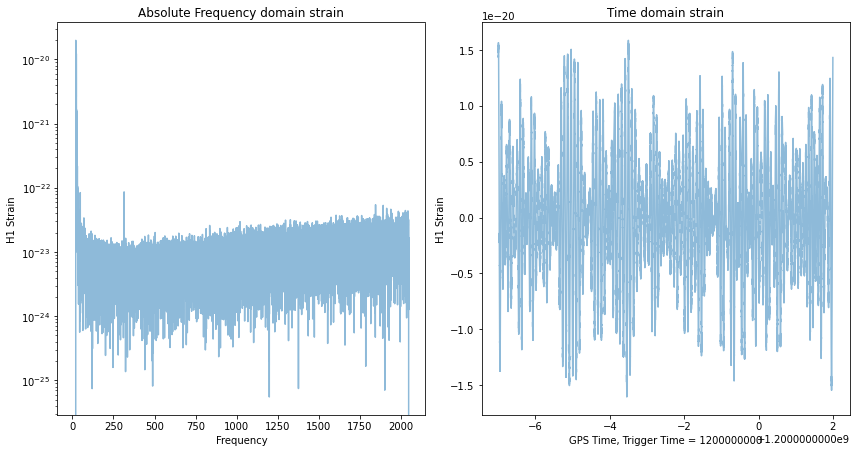

In [126]:
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.semilogy(np.arange(ifos[0].minimum_frequency, ifos[0].maximum_frequency, (ifos[0].maximum_frequency - ifos[0].minimum_frequency)/(len(ifos[0].frequency_domain_strain))),abs(ifos[0].frequency_domain_strain), alpha=0.5)
plt.title('Absolute Frequency domain strain')
plt.xlabel('Frequency')
plt.ylabel('H1 Strain')

plt.subplot(2,2,2)
plt.plot(np.arange(ifos.start_time,ifos.start_time+duration,duration/(len(ifos[0].time_domain_strain))),ifos[0].time_domain_strain[:], alpha=0.5)
plt.title('Time domain strain')
plt.ylabel('H1 Strain')
plt.xlabel('GPS Time')

fig.tight_layout()

The above signal is 9 seconds long. We can see from the time domain plot, the signal starts 7 seconds prior to the trigger_time=injection_dict['geocent_time'] and finishes 2 seconds after this. As is coded in

    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency, duration=duration,
        start_time=(trigger_time + 2 - duration))

Let's now look at some plots for the same system but with 10 times the masses.

15:34 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
15:34 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
15:34 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.


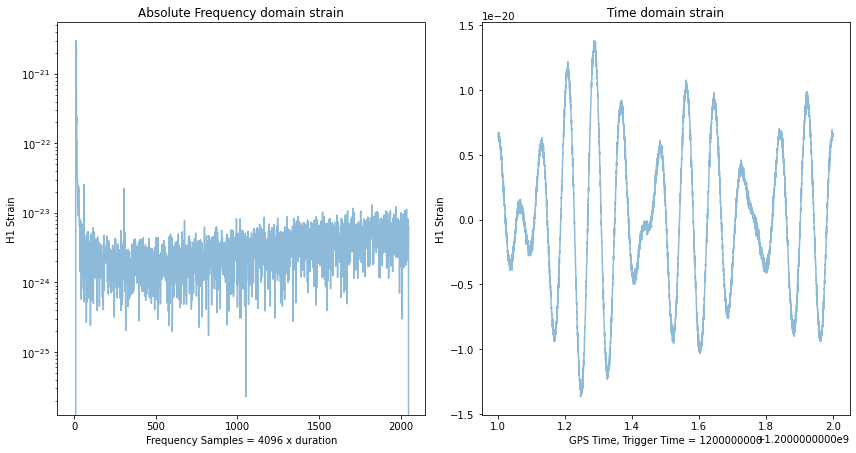

In [115]:
injection_dict=dict(mass_1=samples['mass_1_det'][349]*10, mass_ratio=samples['mass_ratio'][349], redshift=samples['redshift'][349], 
    theta_jn=theta_jn[349], psi=psi[349], phase=phase[349], geocent_time=1200000000, 
    ra=ra[349], dec=dec[349], a_1=samples['a_1'][349], a_2=samples['a_2'][349], 
    phi_12=phi_12[349], phi_jl=phi_jl[349], 
    tilt_1=samples['tilt_1'][349], tilt_2=samples['tilt_2'][349])


#  Define time and frequency parameters

sampling_frequency=4096
# this function uses lal to estimate the duration of the signal and multiplies it by a safety, 1.1 by default
duration=np.round(ut.calculate_time_to_merger(minimum_frequency,samples['mass_1_det'][349]*10,samples['mass_2_det'][349]*10, samples['chi_eff'][349])+1,0)
trigger_time=injection_dict['geocent_time'] #- duration
minimum_frequency=10

# Sometimes the duration above 20Hz (or chosen frequency) is zero. In these cases I set the SNR to none.
if duration is 0:
    H1_snr_349_x10 = None

else:

    #  Setup waveform generator

    waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                            reference_frequency=20., minimum_frequency=minimum_frequency)
    waveform_generator = bilby.gw.WaveformGenerator(
            duration=duration, sampling_frequency=sampling_frequency,
            frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
            waveform_arguments=waveform_arguments,
            parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters)


    #  Setup interferometers and inject signal

    ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
    for ifo in ifos:
        ifo.minimum_frequency = minimum_frequency
        ifo.maximum_frequency = sampling_frequency/2.
        # in controlling the psd, a separate file would need specified for LIGO (aLIGO) and Virgo (AdV)
        #ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='AdV_psd.txt')

    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency, duration=duration,
        start_time=(trigger_time + 2 - duration))
    # try:
    #     ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)
    # except:
    #     print(injection_dict)
    #     print(duration)
    #     continue
    ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)

    # Access injection data
    H1_snr_349_x10 = ifos.meta_data['H1']['optimal_SNR']
    L1_snr_349_x10 = ifos.meta_data['L1']['optimal_SNR']
    V1_snr_349_x10 = ifos.meta_data['V1']['optimal_SNR']

fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.semilogy(abs(ifos[0].frequency_domain_strain), alpha=0.5)
plt.title('Absolute Frequency domain strain')
plt.xlabel('Frequency')
plt.ylabel('H1 Strain')

plt.subplot(2,2,2)
plt.plot(np.arange(ifos.start_time,ifos.start_time+duration,duration/(len(ifos[0].time_domain_strain))),ifos[0].time_domain_strain[:], alpha=0.5)
plt.title('Time domain strain')
plt.ylabel('H1 Strain')
plt.xlabel('GPS Time')

fig.tight_layout()

This is a much shorter signal in the time domain, about 1s and clearly has a much stronger signal, SNR=8.6 compared to 3.6 for the original signal.

What if I now change the waveform approximant? IMRPhenomPv2 to IMRPhenomXP
* effect on signal
    * length: still 1s
    * strength: 8.674 from 8.656 so a slightly higher SNR
    
I am noticing that each time a run the same code the output waveform looks different.

15:33 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
15:33 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.
15:33 bilby WARNING : Injecting signal outside segment, start_time=1200000001.0, merger time=1200000000.


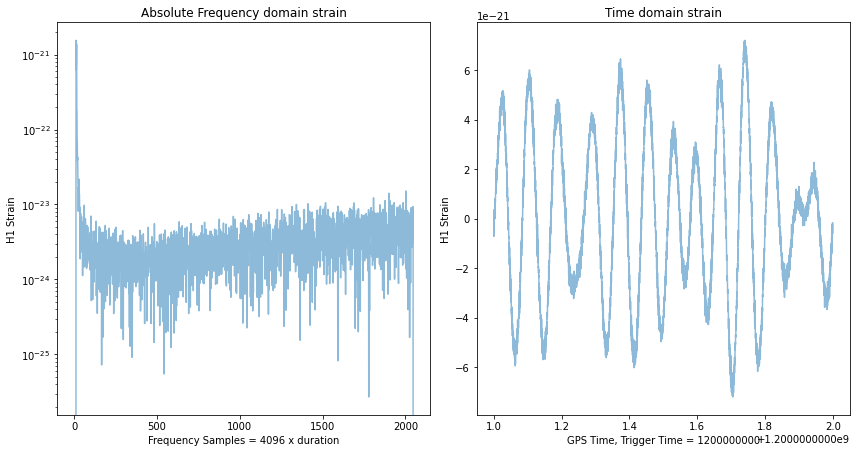

In [113]:
injection_dict=dict(mass_1=samples['mass_1_det'][349]*10, mass_ratio=samples['mass_ratio'][349], redshift=samples['redshift'][349], 
    theta_jn=theta_jn[349], psi=psi[349], phase=phase[349], geocent_time=1200000000, 
    ra=ra[349], dec=dec[349], a_1=samples['a_1'][349], a_2=samples['a_2'][349], 
    phi_12=phi_12[349], phi_jl=phi_jl[349], 
    tilt_1=samples['tilt_1'][349], tilt_2=samples['tilt_2'][349])


#  Define time and frequency parameters

sampling_frequency=4096
# this function uses lal to estimate the duration of the signal and multiplies it by a safety, 1.1 by default
duration=np.round(ut.calculate_time_to_merger(minimum_frequency,samples['mass_1_det'][349]*10,samples['mass_2_det'][349]*10, samples['chi_eff'][349])+1,0)
trigger_time=injection_dict['geocent_time'] #- duration
minimum_frequency=10

# Sometimes the duration above 20Hz (or chosen frequency) is zero. In these cases I set the SNR to none.
if duration is 0:
    H1_snr_349_x10_XP = None

else:

    #  Setup waveform generator

    waveform_arguments = dict(waveform_approximant='IMRPhenomXP',
                            reference_frequency=20., minimum_frequency=minimum_frequency)
    waveform_generator = bilby.gw.WaveformGenerator(
            duration=duration, sampling_frequency=sampling_frequency,
            frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
            waveform_arguments=waveform_arguments,
            parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters)


    #  Setup interferometers and inject signal

    ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
    for ifo in ifos:
        ifo.minimum_frequency = minimum_frequency
        ifo.maximum_frequency = sampling_frequency/2.
        # in controlling the psd, a separate file would need specified for LIGO (aLIGO) and Virgo (AdV)
        #ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='AdV_psd.txt')

    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency, duration=duration,
        start_time=(trigger_time + 2 - duration))
    # try:
    #     ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)
    # except:
    #     print(injection_dict)
    #     print(duration)
    #     continue
    ifos.inject_signal(waveform_generator=waveform_generator, parameters=injection_dict)

    # Access injection data
    H1_snr_349_x10_XP = ifos.meta_data['H1']['optimal_SNR']
    L1_snr_349_x10_XP = ifos.meta_data['L1']['optimal_SNR']
    V1_snr_349_x10_XP = ifos.meta_data['V1']['optimal_SNR']

fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.semilogy(abs(ifos[0].frequency_domain_strain), alpha=0.5)
plt.title('Absolute Frequency domain strain')
plt.xlabel('Frequency')
plt.ylabel('H1 Strain')

plt.subplot(2,2,2)
plt.plot(np.arange(ifos.start_time,ifos.start_time+duration,duration/(len(ifos[0].time_domain_strain))),ifos[0].time_domain_strain[:], alpha=0.5)
plt.title('Time domain strain')
plt.ylabel('H1 Strain')
plt.xlabel('GPS Time')

fig.tight_layout()

In [117]:
H1_snr_349_x10

8.656237351617296

In [ ]:
bilby.core.utils.log.setup_logger(log_level=0)